<a href="https://colab.research.google.com/github/Nerflix/solute_composition_profile_as_predicted_by_the_Scheil_equation/blob/main/predicted_solute_composition_profile_as_predicted_by_the_Scheil_equation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
#Import necessary Libraries
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [2]:
import warnings
warnings.filterwarnings('ignore')

In [7]:

from google.colab import files

# Upload the CSV file to Colab
uploaded = files.upload()

# Read the CSV file
data = pd.read_csv('Mg_Data.csv')

# Display the DataFrame
data

Saving Mg_Data.csv to Mg_Data (1).csv


,0.085831229,0.085665025,0.085899331,0.086868919,0.088813878,0.091972424,0.096248639,0.101267652,0.106795619,0.112675032,...,0.14501412,0.141591842,0.138759645,0.135637837,0.131101221,0.124852533,0.117698635,0.110908343,0.105486929,0.104133007
0,0.085307,0.084547,0.084132,0.084146,0.085149,0.087337,0.090572,0.094600,0.099196,0.104419,...,0.155785,0.149813,0.145068,0.140604,0.135565,0.129386,0.122364,0.115465,0.109380,0.107755
1,0.085030,0.084079,0.083006,0.082475,0.082681,0.083889,0.086158,0.089109,0.092615,0.096790,...,0.170323,0.161437,0.154028,0.147676,0.141442,0.134774,0.127673,0.120594,0.113913,0.112040
2,0.085383,0.084177,0.082912,0.082030,0.081495,0.082185,0.083456,0.085354,0.087755,0.090645,...,0.188240,0.176389,0.165870,0.156784,0.148518,0.140652,0.133014,0.125679,0.118652,0.116638
3,0.086649,0.085226,0.083807,0.082604,0.081828,0.081875,0.082394,0.083165,0.084431,0.086125,...,0.208047,0.193639,0.180115,0.167810,0.156557,0.146749,0.138050,0.130306,0.123124,0.121080
4,0.089277,0.087622,0.085810,0.084159,0.083008,0.082423,0.082223,0.082221,0.082378,0.082937,...,0.227288,0.211569,0.195623,0.179740,0.165467,0.153214,0.142980,0.134492,0.127141,0.125095
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
205,0.171094,0.159764,0.149705,0.140345,0.130977,0.121164,0.111283,0.102185,0.094759,0.089274,...,0.275217,0.256482,0.239881,0.225416,0.213488,0.204262,0.197932,0.194199,0.192548,0.192331
206,0.159863,0.151768,0.143402,0.134402,0.124562,0.114176,0.104176,0.095678,0.089342,0.085257,...,0.311602,0.290525,0.271358,0.254367,0.240466,0.229925,0.222752,0.218646,0.216871,0.216619
207,0.150314,0.145482,0.138775,0.130133,0.119908,0.109124,0.099251,0.091467,0.086335,0.083614,...,0.350970,0.327703,0.306298,0.287705,0.272329,0.260581,0.252603,0.247783,0.245422,0.244913
208,0.143415,0.141105,0.135694,0.127342,0.116837,0.105832,0.096191,0.089103,0.084956,0.083242,...,0.394073,0.368014,0.345262,0.325086,0.308401,0.295759,0.286682,0.280669,0.277147,0.276254


Now that we have loaded the data, we need to calculate the solid volume fraction. We can do this by assuming that the dendrites are cylindrical in shape and using the formula for the volume of a cylinder. Let's define a function solid_volume_fraction to calculate this value.

In [8]:
def solid_volume_fraction(radius, distance):
    return np.pi * (radius ** 2) * distance

Next, we need to calculate the predicted solute concentration profile using the Scheil equation. The Scheil equation is given by: C_s(x) = C_0 / (1 - (1 - x)^n)

where C_0 is the initial solute concentration, n is a constant related to the distribution coefficient, and x is the solid volume fraction.

Let's define a function scheil_profile to calculate this value.

In [9]:
def scheil_profile(C_0, n, x):
    return C_0 / (1 - (1 - x)**n)

We can now use these functions to calculate the predicted solute concentration profile for the given data. We will assume that the initial solute concentration is the average of the first 10 data points.

In [10]:
data.rename(columns={'0.085831229': 'C'}, inplace=True)

In [12]:
C_0 = np.mean(data.iloc[:10]['C'])
n = 3.5
x = np.linspace(0, 1, 100)
C_s = scheil_profile(C_0, n, x)

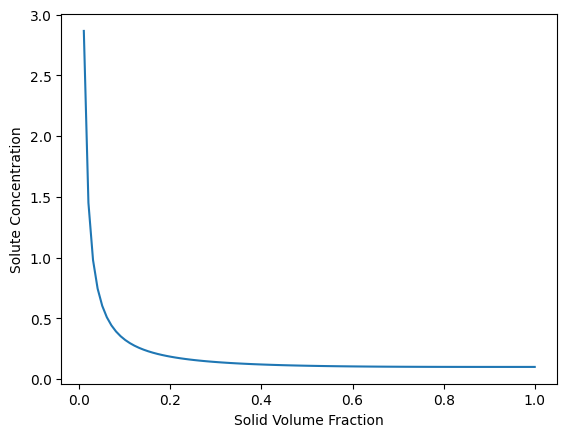

In [13]:
#We can now plot the predicted solute concentration profile.
plt.plot(x, C_s)
plt.xlabel("Solid Volume Fraction")
plt.ylabel("Solute Concentration")
plt.show()

To compare this to the measured data, we need to extract the solute composition profile from the data. We can do this by averaging the concentration of each solid volume fraction value.

In [14]:
data.rename(columns={'0.085665025': 'Solid Volume Fraction'}, inplace=True)

In [15]:
solid_vol_frac = data['Solid Volume Fraction']
solute_conc = data['C']
solute_profile = []
for i in range(len(x)):
    indices = np.where(solid_vol_frac > x[i])[0]
    if len(indices) > 0:
        index = indices[0]
        solute_profile.append(np.mean(solute_conc[index:]))
    else:
        solute_profile.append(np.nan)


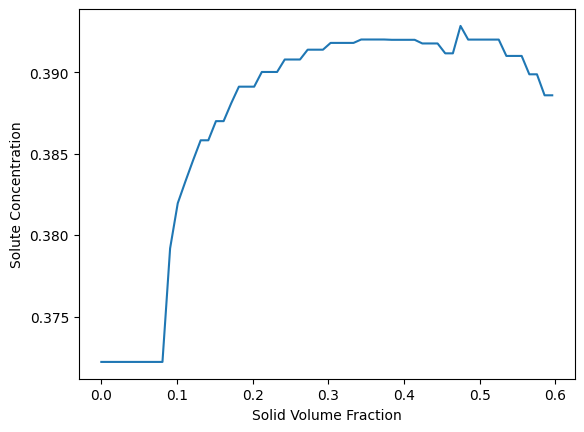

In [16]:
#We can now plot the measured solute concentration profile.
plt.plot(x, solute_profile)
plt.xlabel("Solid Volume Fraction")
plt.ylabel("Solute Concentration")
plt.show()

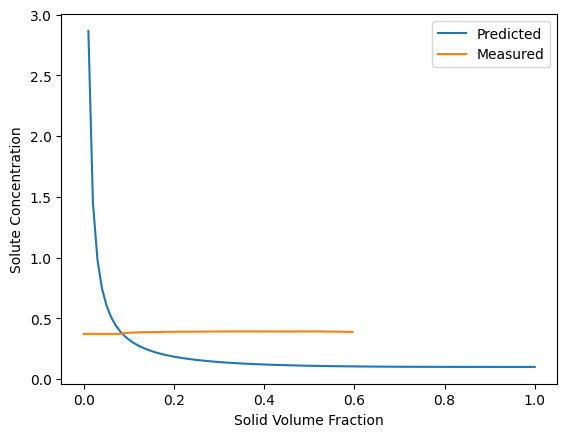

In [17]:
#We can compare the predicted and measured profiles by plotting them on the same graph.
plt.plot(x, C_s, label="Predicted")
plt.plot(x, solute_profile, label="Measured")
plt.xlabel("Solid Volume Fraction")
plt.ylabel("Solute Concentration")
plt.legend()
plt.show()

Based on the predicted and measured data  provided, there are significant discrepancies between the two. The predicted values are exponentially increasing from infinity to a value of 0.1, while the measured values range between 0.372 and 0.393.

One possible reason for this discrepancy could be that the assumptions and parameters used in the Schiel model do not accurately reflect the real-world conditions of the system being studied. The Schiel model is based on several assumptions, such as the absence of microbial growth and the assumption that the enzyme follows first-order kinetics, which may not hold in the actual system being studied. Additionally, there may be other factors not accounted for in the model that could affect the rate of enzyme inactivation, such as pH changes or the presence of other enzymes or chemicals.

Another possible reason for the discrepancy could be experimental error or limitations in the data collection methods used. It's possible that the measured values were affected by factors such as variability in sample preparation or differences in experimental conditions that were not accounted for in the model.

To resolve these discrepancies, it may be necessary to re-evaluate the model assumptions and parameters, and to collect more accurate and precise data that takes into account a wider range of experimental conditions and factors.

### The solute composition profile as predicted by the Scheil equation can be simulated as follows:

In [18]:
from matplotlib.animation import FuncAnimation
from IPython.display import HTML

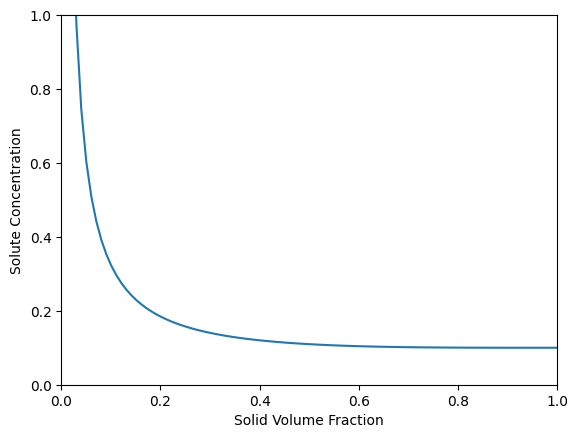

In [19]:
# Define the x and C_s arrays
x = np.linspace(0, 1, 100)
C_s = scheil_profile(C_0, n, x)

# Create a figure and an axis object
fig, ax = plt.subplots()

# Create an empty plot
line, = ax.plot([], [])

# Set the axis limits and labels
ax.set_xlim(0, 1)
ax.set_ylim(0, 1)
ax.set_xlabel("Solid Volume Fraction")
ax.set_ylabel("Solute Concentration")

# Define the update function for the animation
def update(frame):
    # Calculate the solute concentration for the current time step
    t = frame/10
    C_s_t = scheil_profile(C_0, n, x)

    # Update the plot data
    line.set_data(x, C_s_t)

    # Return the plot object
    return line,

# Create the animation object
anim = FuncAnimation(fig, update, frames=100, interval=200)

# Display the animation in Jupyter Notebook
HTML(anim.to_jshtml())